In [2]:
# Imports
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
# Display settings
pd.set_option('display.max_colwidth', None)

# Load the dataset
dataset_path = Path("../datasets/20251004_065231_reddit_posts.pkl")


print("Loading dataset from:", dataset_path)
if not dataset_path.exists():
    raise FileNotFoundError(f"❌ Dataset not found at: {dataset_path}")

# Load data
df = pd.read_pickle(dataset_path)
print("✅ Dataset loaded successfully.")
print("Shape:", df.shape)
print(df.head(2))

Loading dataset from: ..\datasets\20251004_065231_reddit_posts.pkl
✅ Dataset loaded successfully.
Shape: (78, 7)
   source  \
0  reddit   
1  reddit   

                                                                                                     query  \
0  "Palo Alto" (school OR schools OR district OR education OR homework OR teacher OR teachers OR students)   
1  "Palo Alto" (school OR schools OR district OR education OR homework OR teacher OR teachers OR students)   

                                                                                                                                   topic  \
0  Mark Zuckerberg and his wife shut down their schools in East Palo Alto, CA, in alignment with president Trump's Anti-DEI initiatives.   
1  Mark Zuckerberg and his wife shut down their schools in East Palo Alto, CA, in alignment with president Trump's Anti-DEI initiatives.   

                                                                                               

Using 78 documents for topic modeling.
Document-term matrix shape: (78, 5479)

🟢 Topic 1:
just, people, like, don, think, scott, want, kids, women, time

🟢 Topic 2:
like, students, people, just, school, make, don, experience, work, years

🟢 Topic 3:
school, high, housing, people, schools, just, like, kids, students, don

🟢 Topic 4:
people, nyc, sf, like, just, city, don, new, bay, area

🟢 Topic 5:
school, people, like, just, don, kids, high, college, think, schools


C:\Users\tanya\AppData\Local\Temp\ipykernel_22684\3767667196.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="dominant_topic", data=df, palette="viridis")


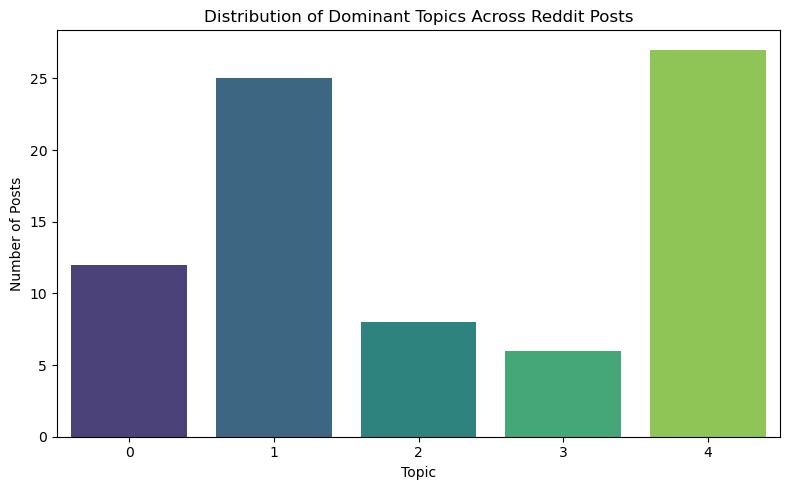


🧩 Topic 0 Example Posts:
Example 1: Fuck no. I am doing my best to ensure that they will be successful after 18, but if something happens and they need somewhere to go, my door (wife agrees with this) is ALWAYS open. My kids are under 10, but my husband and I both plan to let them stay as long as they need to. It’s expensive and as lo...

Example 2: Yeah, Palo Alto is a brutal shock to the system, took me over a year to get comfortable there. It’s not Santa Cruz, but I would say that Menlo Park and Los Altos are slower-paced, low-key, sleepy family friendly. Mountain View and Redwood City are more diverse and less obnoxiously rich. Redwood City...


🧩 Topic 1 Example Posts:
Example 1: It's almost as if schools should be funded by the public rather than the whims of the megarich. It was just something he did for clout and taxes. You think his wife would do better - but looks like they’re a bird of a feather. good to know they're both pieces of shit. i hope trump comes for them any...



In [ ]:
# Prepare text for topic modeling
# Combine all comments for each post into one text block
df["doc_text"] = df["comments_flat"].apply(lambda x: " ".join(x) if isinstance(x, list) else str(x))
df = df[df["doc_text"].str.strip() != ""]
print(f"Using {len(df)} documents for topic modeling.")

# Vectorize text
vectorizer = CountVectorizer(
    max_df=0.9,          # ignore overly common words
    min_df=2,            # ignore rare words
    stop_words="english"
)
dtm = vectorizer.fit_transform(df["doc_text"])
print("Document-term matrix shape:", dtm.shape)


# LDA Topic Modeling
lda = LatentDirichletAllocation(
    n_components=5,      # number of topics
    random_state=42,
    learning_method="batch"
)
lda.fit(dtm)


# Display Top Words per Topic
def display_topics(model, feature_names, no_top_words=10):
    for idx, topic in enumerate(model.components_):
        print(f"\n🟢 Topic {idx + 1}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

feature_names = vectorizer.get_feature_names_out()
display_topics(lda, feature_names, 10)


# Assign Dominant Topic to Each Post
topic_values = lda.transform(dtm)
df["dominant_topic"] = topic_values.argmax(axis=1)


# Plot Topic Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x="dominant_topic", data=df, palette="viridis")
plt.title("Distribution of Dominant Topics Across Reddit Posts")
plt.xlabel("Topic")
plt.ylabel("Number of Posts")
plt.tight_layout()
plt.show()


#View Example Posts for Each Topic
for topic_num in sorted(df["dominant_topic"].unique()):
    print(f"\n🧩 Topic {topic_num} Example Posts:")
    sample_texts = df[df["dominant_topic"] == topic_num]["doc_text"].head(2).to_list()
    for i, text in enumerate(sample_texts, 1):
        print(f"Example {i}: {text[:300]}...\n")

## District Comparison via Topic Modeling

✅ Loaded datasets:
Palo Alto: (78, 7)  | Oklahoma City: (78, 6)
📘 Palo Alto posts: 78
📗 Oklahoma City posts: 78

🟦 Palo Alto Topics:


,Topic,Top Words
0,1,"just, people, like, don, think, scott, want, kids, women, time"
1,2,"like, students, people, just, school, make, don, experience, work, years"
2,3,"school, high, housing, people, schools, just, like, kids, students, don"
3,4,"people, nyc, sf, like, just, city, don, new, bay, area"
4,5,"school, people, like, just, don, kids, high, college, think, schools"



🟩 Oklahoma City Topics:


,Topic,Top Words
0,1,"just, people, like, don, think, scott, want, kids, women, time"
1,2,"like, students, people, just, school, make, don, experience, work, years"
2,3,"school, high, housing, people, schools, just, like, kids, students, don"
3,4,"people, nyc, sf, like, just, city, don, new, bay, area"
4,5,"school, people, like, just, don, kids, high, college, think, schools"


C:\Users\tanya\AppData\Local\Temp\ipykernel_22684\163353559.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0], x="dominant_topic", data=palo_df, palette="Blues")
C:\Users\tanya\AppData\Local\Temp\ipykernel_22684\163353559.py:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[1], x="dominant_topic", data=okc_df, palette="Greens")


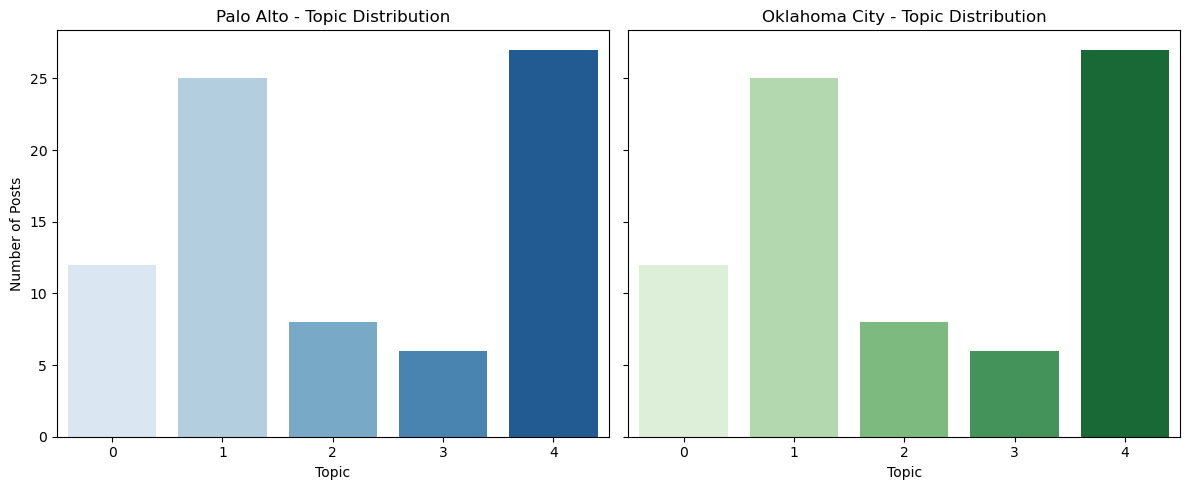

,District,Posts,Top Topic IDs
0,Palo Alto,78,4
1,Oklahoma City,78,4


In [ ]:
#District Comparison via Topic Modeling
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

pd.set_option("display.max_colwidth", None)
datasets_path = Path("../datasets")

# Palo Alto and Oklahoma City Reddit data 
palo_path = datasets_path / "20251004_065231_reddit_posts.pkl"
okc_path = datasets_path / "20251004_063950_reddit_posts.pkl"

palo_df = pd.read_pickle(palo_path)
okc_df = pd.read_pickle(okc_path)

print(" Loaded datasets:")
print("Palo Alto:", palo_df.shape, " | Oklahoma City:", okc_df.shape)

# Clean and prepare text data
def prepare_text(df):
    df["doc_text"] = df["comments_flat"].apply(lambda x: " ".join(x) if isinstance(x, list) else str(x))
    df = df[df["doc_text"].str.strip() != ""]
    return df

palo_df = prepare_text(palo_df)
okc_df = prepare_text(okc_df)

print(f"📘 Palo Alto posts: {len(palo_df)}")
print(f"📗 Oklahoma City posts: {len(okc_df)}")


# Define function for LDA topic modeling
def run_lda(df, n_topics=5, label="District"):
    vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words="english")
    dtm = vectorizer.fit_transform(df["doc_text"])

    lda = LatentDirichletAllocation(
        n_components=n_topics,
        random_state=42,
        learning_method="batch"
    )
    lda.fit(dtm)

    # Top words per topic
    feature_names = vectorizer.get_feature_names_out()
    topics = []
    for idx, topic in enumerate(lda.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-11:-1]]
        topics.append({"Topic": idx + 1, "Top Words": ", ".join(top_words)})

    # Assign dominant topic to each post
    topic_values = lda.transform(dtm)
    df["dominant_topic"] = topic_values.argmax(axis=1)
    
    return df, pd.DataFrame(topics)


# Run topic modeling for each district
palo_df, palo_topics = run_lda(palo_df, label="Palo Alto")
okc_df, okc_topics = run_lda(okc_df, label="Oklahoma City")


# Display top words per topic
print("\n🟦 Palo Alto Topics:")
display(palo_topics)

print("\n🟩 Oklahoma City Topics:")
display(okc_topics)


# Compare topic distributions visually
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.countplot(ax=axes[0], x="dominant_topic", data=palo_df, palette="Blues")
axes[0].set_title("Palo Alto - Topic Distribution")
axes[0].set_xlabel("Topic")
axes[0].set_ylabel("Number of Posts")

sns.countplot(ax=axes[1], x="dominant_topic", data=okc_df, palette="Greens")
axes[1].set_title("Oklahoma City - Topic Distribution")
axes[1].set_xlabel("Topic")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()


# Combined summary for reporting
summary = pd.DataFrame({
    "District": ["Palo Alto", "Oklahoma City"],
    "Posts": [len(palo_df), len(okc_df)],
    "Top Topic IDs": [
        palo_df["dominant_topic"].value_counts().idxmax(),
        okc_df["dominant_topic"].value_counts().idxmax()
    ]
})

display(summary)

### Summary
The topic modeling showed that people in both Palo Alto and Oklahoma City talk a lot about schools, students, and education, but in different ways. Palo Alto posts often focus on things like college prep, housing, and competition in the Bay Area, while Oklahoma City posts talk more about school quality, student workload, and community issues. In short, both districts care about education, but their discussions reflect different local concerns and priorities.


## Sentiment Analysis + Word Clouds

In [9]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER 
nltk.download('vader_lexicon')

# Initialize 
sia = SentimentIntensityAnalyzer()

# Compute sentiment score for each post 
df['sentiment_score'] = df['doc_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Label sentiment category
df['sentiment_label'] = df['sentiment_score'].apply(
    lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral')
)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tanya\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


C:\Users\tanya\AppData\Local\Temp\ipykernel_22684\3507850927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_label', data=df, palette='coolwarm')


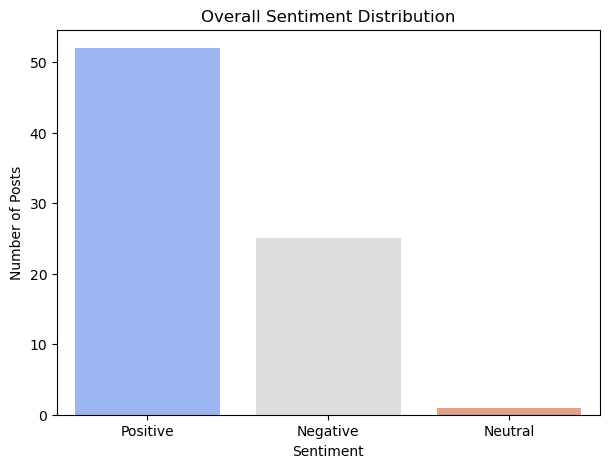

C:\Users\tanya\AppData\Local\Temp\ipykernel_22684\3507850927.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='dominant_topic', y='sentiment_score', data=df, palette='viridis')


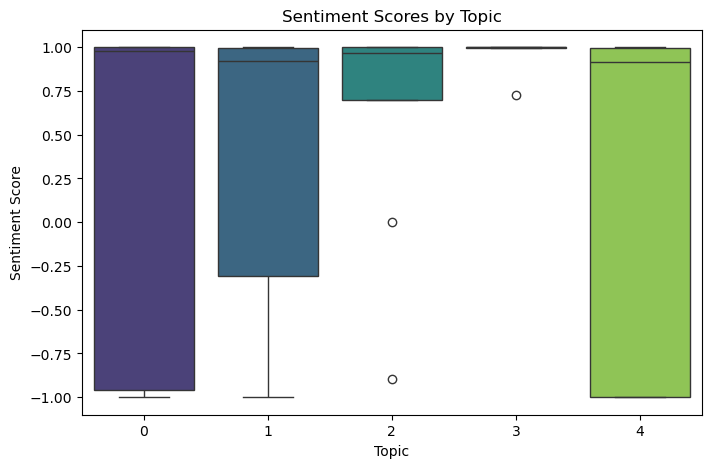

In [10]:
# Sentiment distribution overall
plt.figure(figsize=(7, 5))
sns.countplot(x='sentiment_label', data=df, palette='coolwarm')
plt.title("Overall Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Posts")
plt.show()

# Sentiment by dominant topic
plt.figure(figsize=(8, 5))
sns.boxplot(x='dominant_topic', y='sentiment_score', data=df, palette='viridis')
plt.title("Sentiment Scores by Topic")
plt.xlabel("Topic")
plt.ylabel("Sentiment Score")
plt.show()

In [13]:
!pip install wordcloud

  Using cached wordcloud-1.9.4-cp313-cp313-win_amd64.whl.metadata (3.5 kB)
Using cached wordcloud-1.9.4-cp313-cp313-win_amd64.whl (300 kB)


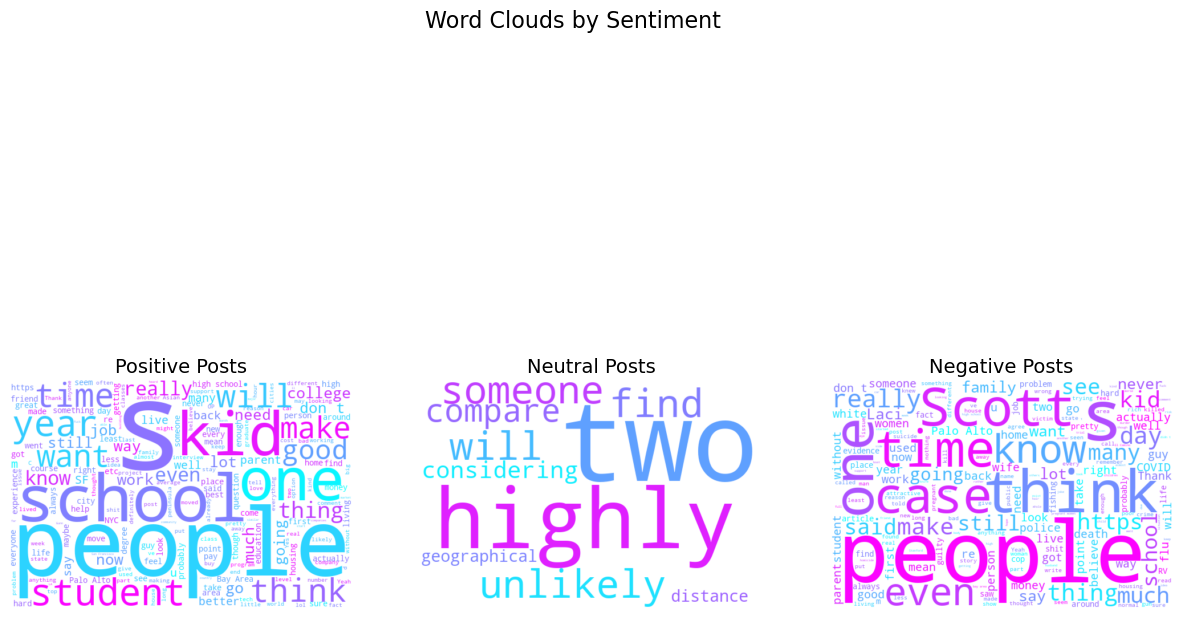

In [14]:
from wordcloud import WordCloud

# Generate word clouds for each sentiment
sentiments = ['Positive', 'Neutral', 'Negative']
plt.figure(figsize=(15, 10))

for i, sentiment in enumerate(sentiments):
    text = " ".join(df[df['sentiment_label'] == sentiment]['doc_text'])
    wc = WordCloud(width=600, height=400, background_color='white', colormap='cool').generate(text)
    
    plt.subplot(1, 3, i+1)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"{sentiment} Posts", fontsize=14)

plt.suptitle("Word Clouds by Sentiment", fontsize=16)
plt.show()

## Sentiment Distribution Between Districts